In [213]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [214]:
house_file_path="E:\\Machine_learning_projects\\proj1\\housing.csv"

In [160]:
housing=pd.read_csv(house_file_path)

In [215]:
housing[:5]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [219]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [162]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [163]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [164]:
housing["longitude"].max()

-114.31

In [165]:
housing["longitude"].min()

-124.35

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026C82A48F28>,
      dtype=object)

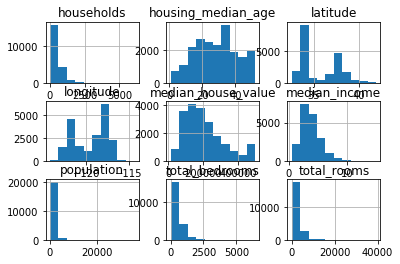

In [166]:
housing.hist()

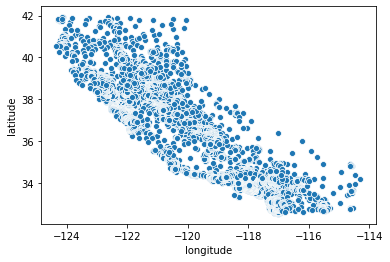

In [172]:
import seaborn as sns
sns.scatterplot(x=housing["longitude"],y=housing["latitude"])


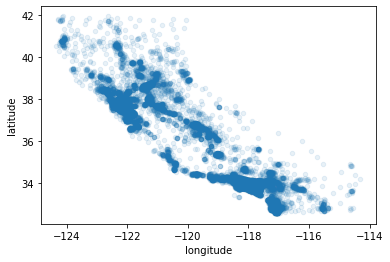

In [173]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1)


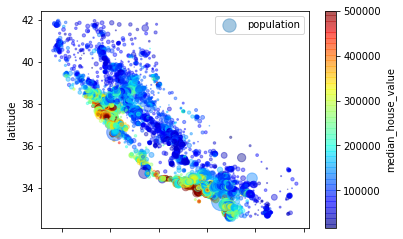

In [174]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,s=housing["population"]/100,label="population",c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True)

In [175]:
#corroleation
corr_matrix=housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

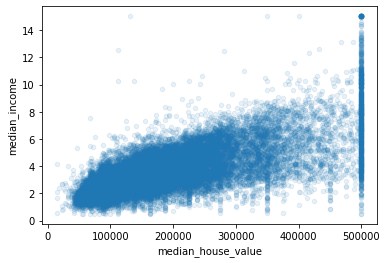

In [176]:
housing.plot(kind="scatter",x="median_house_value",y="median_income",alpha=0.1)



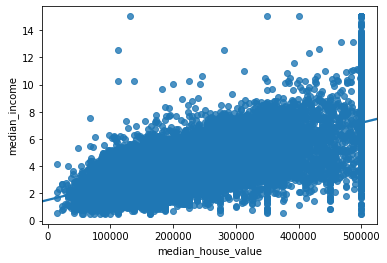

In [177]:
import seaborn as sns
sns.regplot(x=housing["median_house_value"],y=housing["median_income"])

In [167]:
#first approach
#determined train ,test set by your self 
trainTOtest=0.8
import numpy as np 
Ind=np.random.permutation(len(housing))
print(Ind)
triantotestsize=int(trainTOtest*len(housing))
print(triantotestsize)
trainSet=housing[:triantotestsize]
testSet=housing[triantotestsize:]

[12643  1147 11844 ...  2263 13766  5812]
16512


In [168]:
#second approach
##data cleaning
#median=housing["total bedrooms"].median()
#housing["total_bedrooms"].fillna(median,inpplace=True)
from sklearn.impute import SimpleImputer
imputer= SimpleImputer(strategy="median")
housingFilterd=housing.drop("ocean_proximity",axis=1)
housing_cat=housing[["ocean_proximity"]]
imputer.fit(housingFilterd)
X=imputer.transform(housingFilterd)
housingX=pd.DataFrame(X,columns=housingFilterd.columns)

In [ ]:
#handle text catigorical
#conveert text to numirical values using LabelEncoder

from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
housing_cat_1hot=encoder.fit_transform(housing_cat)
#housing_cat_1hot
housingX["ocean_proximity"]=housing_cat_1hot.ravel()
#housingX

In [170]:
#feature Scaling 
#from sklearn.preprocessing import StandardScaler
#std_scale=StandardScaler()
#XX=std_scale.fit_transform(housingX)
#housingX=pd.DataFrame(XX,columns=housingX.columns)
#housingX


In [220]:
#second approach
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housingX,test_size=0.2,random_state=42)

In [221]:
train_set[:5]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,4
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,4
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,4
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,4
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,1


In [222]:
test_set[:5]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,435.0,1392.0,359.0,1.6812,47700.0,1
3024,-119.46,35.14,30.0,2943.0,435.0,1565.0,584.0,2.5313,45800.0,1
15663,-122.44,37.80,52.0,3830.0,435.0,1310.0,963.0,3.4801,500001.0,3
20484,-118.72,34.28,17.0,3051.0,435.0,1705.0,495.0,5.7376,218600.0,0
9814,-121.93,36.62,34.0,2351.0,435.0,1063.0,428.0,3.7250,278000.0,4


In [225]:
print(train_set.shape)
print(test_set.shape)

(16512, 10)
(4128, 10)


In [178]:
house=housing.copy()
house["rooms_per_household"]=housing["total_rooms"]/housing["households"]
house["bedrooms_per_room"]=housing["total_bedrooms"]/housing["total_rooms"]
house["population_per_household"]=housing["population"]/housing["households"]

In [179]:
corr_matrix=house.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

In [180]:
trainx=train_set.drop("median_house_value",axis=1)
trainy=train_set["median_house_value"]
testx=test_set.drop("median_house_value",axis=1)
testy=test_set["median_house_value"]

In [181]:
trainx

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,4
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,4
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,4
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,4
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,1
17848,-121.86,37.42,20.0,5032.0,808.0,2695.0,801.0,6.6227,0
6252,-117.97,34.04,28.0,1686.0,417.0,1355.0,388.0,2.5192,0
9389,-122.53,37.91,37.0,2524.0,398.0,999.0,417.0,7.9892,3
6113,-117.90,34.13,5.0,1126.0,316.0,819.0,311.0,1.5000,0
6061,-117.79,34.02,5.0,18690.0,2862.0,9427.0,2777.0,6.4266,0


In [182]:
#train model using LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg=LinearRegression()
lin_reg.fit(trainx,trainy)

#evaluate error
y_pred=lin_reg.predict(trainx)
lin_rms=mean_squared_error(trainy,y_pred)
lin_rmse=np.sqrt(lin_rms)
lin_rmse

69361.07142906451

In [183]:
#train model 
#using DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor()
tree_reg.fit(trainx,trainy)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [184]:
#evaluate error
house_predect=tree_reg.predict(trainx)
tree_rms=mean_squared_error(trainy,house_predect)
tree_rmse=np.sqrt(tree_rms)
tree_rmse

0.0

In [185]:
#better evaluation using cross validation 
from sklearn.model_selection import cross_val_score
scores=cross_val_score(tree_reg,trainx,trainy,scoring="neg_mean_squared_error",cv=10)
rmse_scores=np.sqrt(-scores)
rmse_scores

array([68615.50515725, 69724.91810598, 71427.87164358, 70874.0419201 ,
       68903.78091325, 68444.47662109, 69915.33308598, 69001.51969491,
       70840.05732575, 70918.15249232])

In [188]:
print(rmse_scores.mean())
print(rmse_scores.std())

69866.56569602169
1038.816469644235


In [ ]:
#using RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
forest_reg=RandomForestRegressor()
forest_reg.fit(trainx,trainy)
ho_predect=forest_reg.predict(trainx)
forest_rms=mean_squared_error(trainy,ho_predect)
forest_rmse=np.sqrt(forest_rms)

In [197]:
forest_rmse

22158.301664746097

## Fine-Tune the model

In [203]:
#using grid search
from sklearn.model_selection import GridSearchCV
param_grid=[{'n_estimators':[3,10,30],'max_features':[2,4,6,8]},{'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]},]
forest_reg=RandomForestRegressor()
grid_search=GridSearchCV(forest_reg,param_grid,cv=5,scoring='neg_mean_squared_error')
grid_search.fit(trainx,trainy)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],


In [205]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

In [207]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=4, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [212]:
final_model=grid_search.best_estimator_
final_pred=final_model.predict(testx)
final_mse=mean_squared_error(testy,final_pred)
final_rmse=np.sqrt(final_mse)
final_rmse

49692.745107916315